# Pymaceuticals Inc.
---

### Observations and Insights
* Based on a summary statistical analysis of the data, Capomulin and Ramicane appear to have relatively similar efficacy in the treatment of cancerous tumors; both appear to be more effective than the other drug regimens in this data set, though both also have the most relative data points.
* The only treatment (of the four selected from the complete data set) which has an outlier in its data is the Infubinol regimen. It may bear further investigation as to why one mouse on this treatment regimen had a significantly lower final tumor volume.
* There is a relatively strong positive correlation between mouse weight and tumor volume for mice on the Capomulin regimen. This would seem to imply that the additional bodyweight may be linked to the growth/expansion of the tumor(s).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_count = merge_df.groupby(["Mouse ID"])["Timepoint"].count()
grouped_df = pd.DataFrame({"Timepoint": grouped_count})
grouped_df.sort_values(by=["Timepoint"], ascending=False).head()

,Timepoint
Mouse ID,
g989,13
a203,10
n364,10
m546,10
m550,10


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df1 = merge_df.set_index('Mouse ID')
dupe_mouse = "g989"
dupe_data = merge_df1.loc[dupe_mouse, :]
dupe_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_df1.drop(index=dupe_mouse)
clean_data = clean_data.reset_index()

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

clean_data1 = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": clean_data1.mean(), 
    "Median Tumor Volume": clean_data1.median(),
    "Tumor Volume Variance": clean_data1.var(), 
    "Tumor Volume Std. Dev": clean_data1.std(),
    "Tumor Volume Std. Err": clean_data1.sem(),
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats2 = clean_data1.agg(["mean", "median", "var", "std", "sem"])
summary_stats2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Total Number of Measurements'>

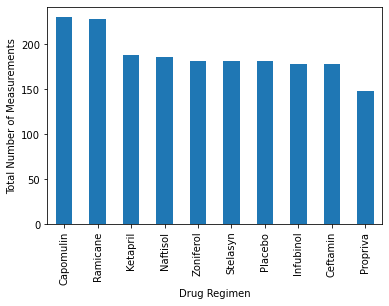

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
clean_data2 = clean_data.groupby(["Drug Regimen"])
mouse_count = clean_data2["Mouse ID"].count().sort_values(ascending=False)
mouse_count.plot.bar(ylabel="Total Number of Measurements")

Text(0, 0.5, 'Total Number of Measurements')

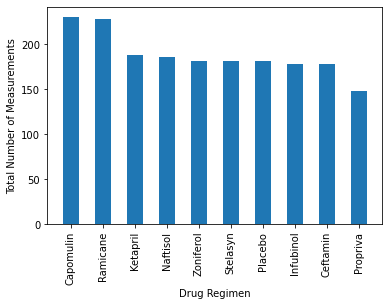

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(clean_data["Drug Regimen"].unique()))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, mouse_count, width=.5)
plt.xticks(tick_locations, mouse_count.index.values, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

<AxesSubplot:ylabel='Sex'>

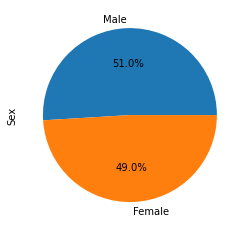

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_data3 = clean_data.groupby(["Sex"])
mouse_count2 = clean_data3["Mouse ID"].count().sort_values(ascending=False)
mouse_count2.plot.pie(ylabel="Sex", autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

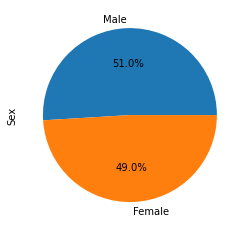

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = clean_data["Sex"].unique()
sizes = mouse_count2

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumor_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")
                                    | (clean_data["Drug Regimen"] == "Ramicane")
                                    | (clean_data["Drug Regimen"] == "Infubinol")
                                    | (clean_data["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = tumor_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df2 = pd.merge(tumor_df, last_timepoint, on=["Mouse ID", "Timepoint"], how="right")
merge_df2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = sorted(merge_df2["Drug Regimen"].unique().tolist())

# Locate the rows which contain mice on each drug and get the tumor volumes; determine outliers using upper and lower bounds
for drug in drug_list:
    drug_data = merge_df2["Tumor Volume (mm3)"].loc[(merge_df2["Drug Regimen"] == drug)]
    quartiles = drug_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = [(drug_data.values <= lower_bound) | (drug_data.values >= upper_bound)]
    outlier_df = pd.DataFrame(drug_data.values, outliers)
    outlier_value = outlier_df[0].loc[(outlier_df.index == True)]

    print(f"Lower Bound for {drug}: {round(lower_bound,4)}")
    print(f"Upper Bound for {drug}: {round(upper_bound,4)}")
    print(f"IQR for {drug}: {round(iqr,4)}")
    print(f"Outliers for {drug}: {round(outlier_value,4)}")

Lower Bound for Capomulin: 20.7046
Upper Bound for Capomulin: 51.832
IQR for Capomulin: 7.7819
Outliers for Capomulin: Series([], Name: 0, dtype: float64)
Lower Bound for Ceftamin: 25.3554
Upper Bound for Ceftamin: 87.6665
IQR for Ceftamin: 15.5778
Outliers for Ceftamin: Series([], Name: 0, dtype: float64)
Lower Bound for Infubinol: 36.8329
Upper Bound for Infubinol: 82.7414
IQR for Infubinol: 11.4771
Outliers for Infubinol: True    36.3213
Name: 0, dtype: float64
Lower Bound for Ramicane: 17.9127
Upper Bound for Ramicane: 54.3068
IQR for Ramicane: 9.0985
Outliers for Ramicane: Series([], Name: 0, dtype: float64)


<AxesSubplot:ylabel='Final Tumor Volume (mm3)'>

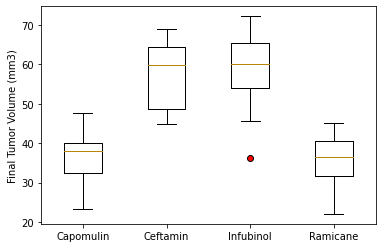

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_df = merge_df2.pivot(columns="Drug Regimen", values="Tumor Volume (mm3)")
boxprops = dict(color="black")
whiskerprops = dict(color="black")
medianprops = dict(color="darkgoldenrod")
flierprops = dict(marker='o', markerfacecolor="red")
box_df.plot.box(ylabel="Final Tumor Volume (mm3)", boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, flierprops=flierprops)

## Line and Scatter Plots

<AxesSubplot:title={'center':'Capomulin treatment of mouse l509'}, xlabel='Time in days', ylabel='Tumor Volume (mm3)'>

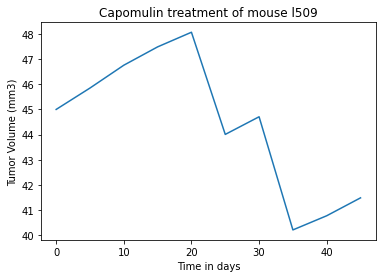

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = "l509"
mouse_data = clean_data.loc[(clean_data["Mouse ID"] == cap_mouse)]
mouse_data.plot.line(x="Timepoint", y="Tumor Volume (mm3)", xlabel="Time in days", ylabel="Tumor Volume (mm3)", title=f"Capomulin treatment of mouse {cap_mouse}", legend=False)

<AxesSubplot:xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

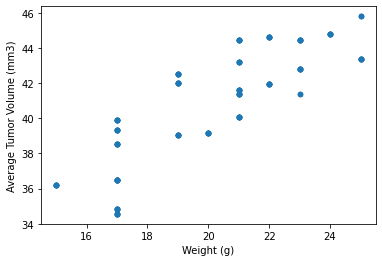

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")]
avg_cap = capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
merged_cap = pd.merge(capomulin_df, avg_cap, on=["Mouse ID"], how="outer")
merged_cap = merged_cap.rename(columns={"Tumor Volume (mm3)_y":"Average Tumor Volume (mm3)"})

merged_cap.plot.scatter(x="Weight (g)", y="Average Tumor Volume (mm3)")

## Correlation and Regression

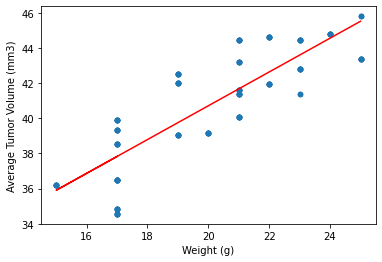

The correlation between mouse weight and the average tumor volume is 0.8344


In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = merged_cap["Weight (g)"]
y_values = merged_cap["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, s=20)
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

correlation = st.pearsonr(merged_cap["Weight (g)"], merged_cap["Average Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],4)}")